In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
%matplotlib inline

In [10]:
# Load and resample to 16k
wav = librosa.load('C:/SimonU/LJ028-0224.wav', sr=22050)
wav_rs = librosa.core.resample(wav[0], orig_sr=22050, target_sr=16384)

# Short Time Fourier Transform for Original and for resampled version
orig_stft = librosa.stft(wav[0], n_fft=8192, hop_length=6144)
rs_stft = librosa.stft(wav_rs, n_fft=2048, hop_length=1024)

# Back to Wave form
wav_orig = librosa.istft(orig_stft, hop_length=6144)
wav_rec = librosa.istft(rs_stft, hop_length=1024)

In [11]:
print('Original')
IPython.display.Audio(data=wav[0], rate=22050)

Original


In [12]:
print('Wave to Spectogram then back to wave with 16k SamplingRate')
IPython.display.Audio(data=wav_rec, rate=16384)

Wave to Spectogram then back to wave with 16k SamplingRate


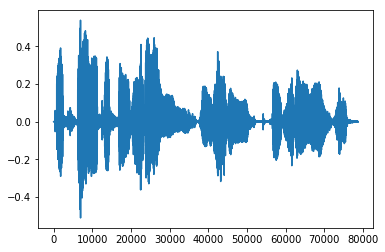

In [13]:
plt.plot(wav[0]);

In [15]:
# Create Mel Filterbank and inverse
mel_base = librosa.filters.mel(sr=16384, n_fft=2048, n_mels=64)
mel_base_inv = np.linalg.pinv(mel_base)
print(mel_base.shape)

(64, 1025)


In [16]:
# Convert to mel scale
mel_rs = mel_base@rs_stft

C:\Users\Simon\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


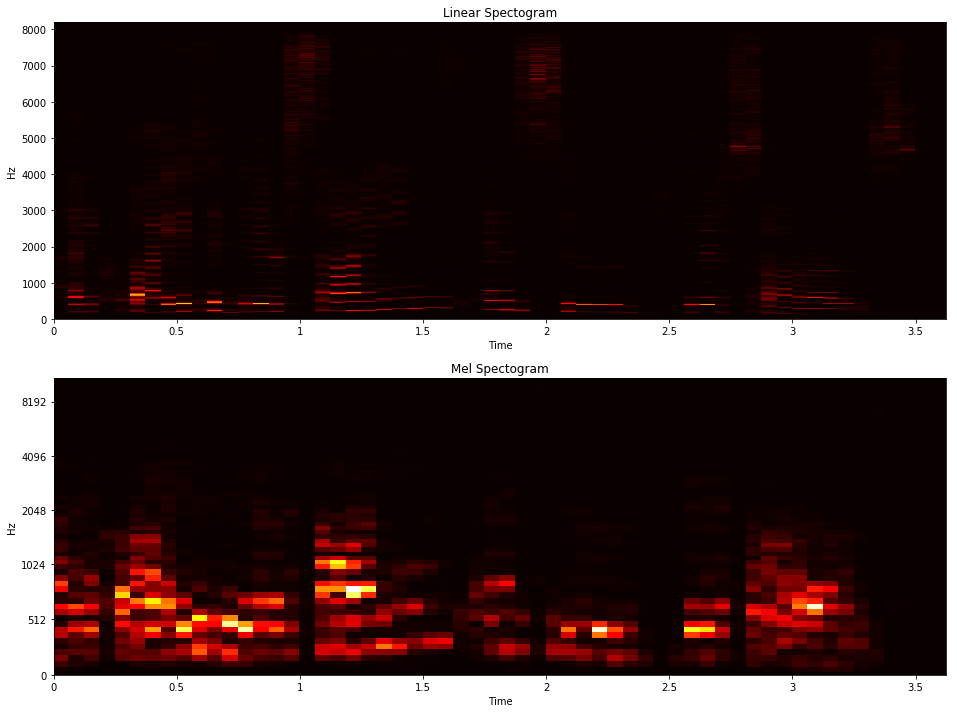

In [17]:
plt.figure(figsize=(16,12));
plt.subplot(2,1,1)
librosa.display.specshow((rs_stft), sr=16384, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram');

plt.subplot(2,1,2)
librosa.display.specshow(mel_rs, sr=16384, hop_length=1024, x_axis='time',y_axis='mel',cmap='hot');
plt.title('Mel Spectogram');


In [18]:
# Reconstruct original from mel
orig = mel_base_inv@mel_rs
wav_rec2 = librosa.istft(orig, hop_length=1024)
IPython.display.Audio(data=wav_rec2, rate=16384)

In [19]:
# Inspection
np.set_printoptions(precision=0, suppress=True, threshold=2000)

display(np.real(orig[:, 1]*100000))
print(np.real(rs_stft[:,1]*100000))

array([     0.,    -58.,   -115.,   -173.,   -230.,   -288.,   -300.,
          -63.,    173.,    410.,    647.,    883.,    901.,    432.,
          -37.,   -506.,   -975.,  -1444.,  -1950.,  -2498.,  -3046.,
        -3594.,  -4143.,  -4691.,  -3022.,      4.,   3031.,   6057.,
         9083.,  12110.,  10132.,   6703.,   3274.,   -154.,  -3583.,
        -7012.,  -6410.,  -5507.,  -4604.,  -3701.,  -2798.,  -1727.,
         1138.,   4004.,   6870.,   9736.,  12602.,  13139.,   6322.,
         -495.,  -7313., -14130., -20947., -22306., -15321.,  -8336.,
        -1350.,   5635.,  12620.,  13549.,   9532.,   5516.,   1499.,
        -2517.,  -6534.,  -3947.,   1397.,   6740.,  12084.,  17427.,
        22771.,  15534.,   6260.,  -3015., -12289., -21563., -30589.,
       -24010., -17431., -10851.,  -4272.,   2307.,   7675.,   7155.,
         6635.,   6116.,   5596.,   5077.,   4375.,   3299.,   2222.,
         1145.,     68.,  -1009.,  -1426.,  -1129.,   -832.,   -536.,
         -239.,     

[    4304.    -4350.     2501.      753.    -2011.     -288.     3732.
     -497.    -6618.     8350.    -5796.    -3351.    13786.   -14629.
     -797.    18847.   -16376.    21581.   -13007.    -3193.   -31764.
    33365.    21328.  -178348.   274077.  -146071.   453751.  -897215.
   389681.   205795.   -83693.   -28957.    41207.   -54338.   -82385.
   102853.    28406.  -146964.   127895.    -1215.   -36882.    11287.
    36682.   -44229.    22142.   -66386.    64846.   -90772.   -21919.
   204060.  -178139.   866792. -1566560.   375073.   907786.  -473356.
   -50475.    26942.  -120625.   130409.     6298.   -46573.    24495.
   -17048.   -28516.    61991.   -19709.   -19904.    74554.   -85273.
    -9375.    94586.  -153408.    80096.   -21312.   495305. -1720634.
  3090945. -3080977.  1055098.  1188818. -1377935.   121345.   459995.
  -272719.    88792.    98012.  -226338.   112340.    99222.  -223179.
   148537.    97064.  -287944.   265589.    -6107.  -341367.   566620.
  -719

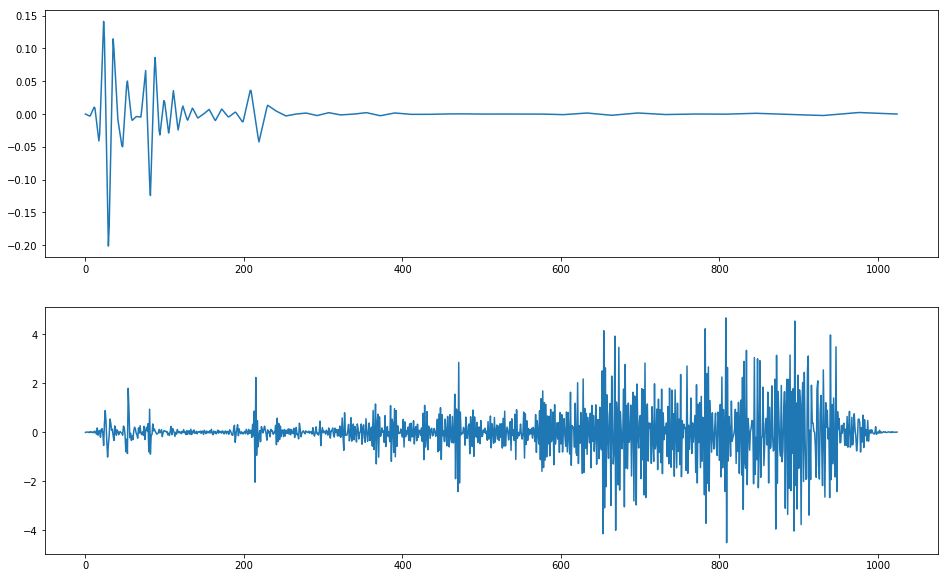

In [20]:
plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.plot(list(range(1025)), np.real(orig[:, 15]));
plt.subplot(2,1,2)
plt.plot(list(range(1025)), np.real(rs_stft[:, 15]));

C:\Users\Simon\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


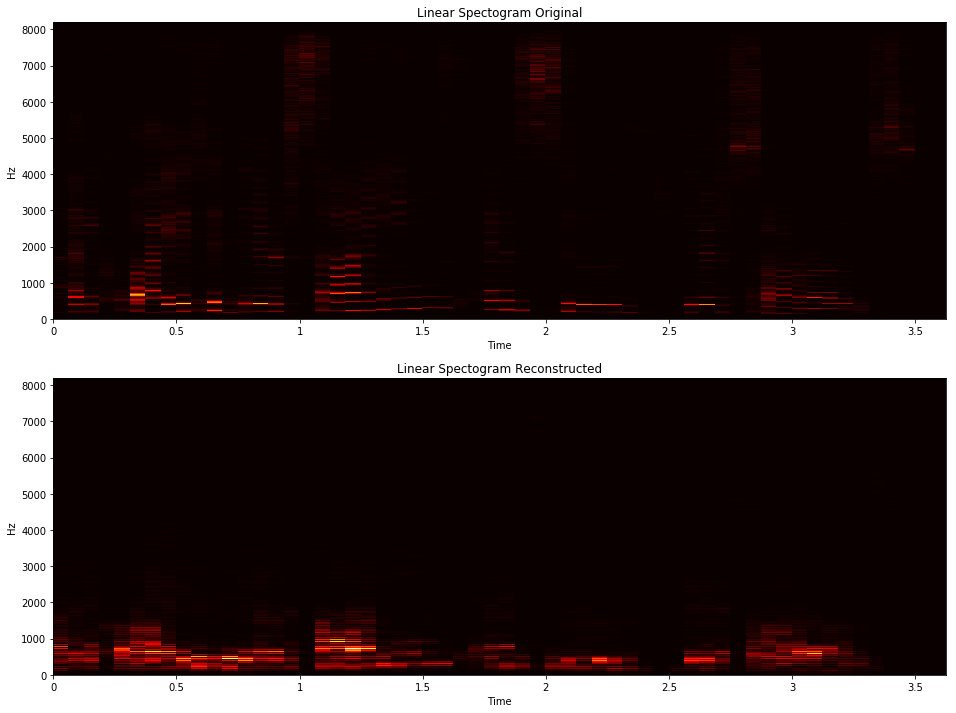

In [22]:
plt.figure(figsize=(16,12));
plt.subplot(2,1,1)
librosa.display.specshow((rs_stft), sr=16384, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Original');

plt.subplot(2,1,2)
librosa.display.specshow(orig, sr=16384, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Reconstructed');


In [3]:
from crush import crusher

In [23]:
crush, crush_inv = crusher(16384, 2048)

In [25]:
s_c = rs_stft[1:].T@crush.T

In [27]:
s_o = s_c@crush_inv.T

In [38]:
s_oo = librosa.istft(s_o.T, hop_length=1024)
IPython.display.Audio(data=s_oo, rate=16384)

C:\Users\Simon\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


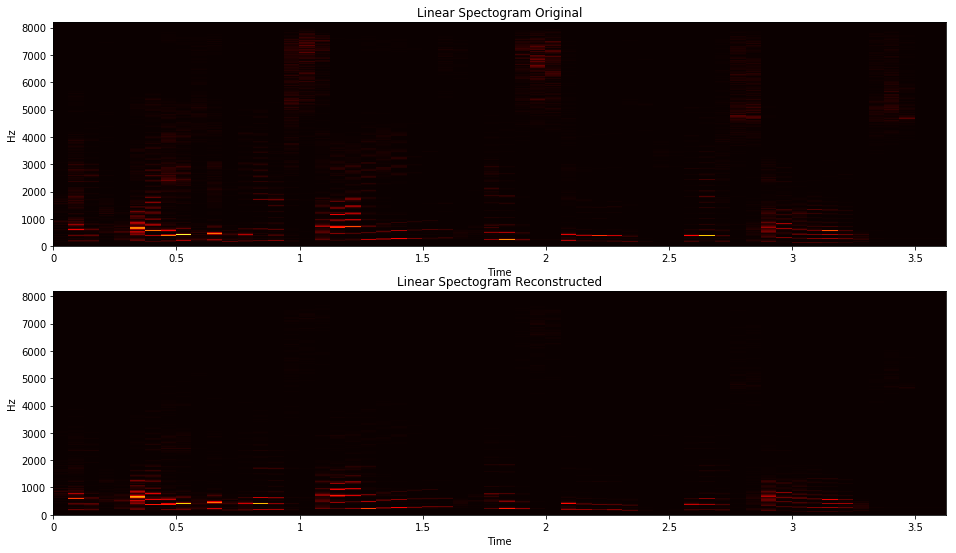

In [45]:
plt.figure(figsize=(16,14));
#plt.subplot(3,1,1)
#librosa.display.specshow((s_c).T, sr=16384, hop_length=1024, x_axis='time',y_axis='mel',cmap='hot');
#plt.title('Linear Spectogram Original');
plt.subplot(3,1,2)
librosa.display.specshow((rs_stft), sr=16384, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Original');
plt.subplot(3,1,3)
librosa.display.specshow(s_o.T, sr=16384, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Reconstructed');
